## Practice OOP: a Well class

More practice on classes.

We'll start by creating a function that can read tops from a file that looks like this:

```rust
# Full Name : SHELL ABENAKI L-57 
# Rotary Table : 31.4 M 
# Water Depth : 108.8 M 
# UWI : 300 L57 44200 59450 
# Regulator Sequence Number : D016 
# Spud Date : 28-MAY-1970 
# Total Depth : 2178.4 M 
# Basin : SCOTIAN BASIN 
# Subbasin : ABENAKI SUBBASIN 
# Latitude (NAD27) : 44.27625 
# Longitude (NAD27) : -59.89431 
# Northing (NAD27) : 4906414.0 
# Easting (NAD27) : 269021.0 
# Latitude (NAD83) : 44.276317 
# Longitude (NAD83) : -59.893536 
# Northing (NAD83) : 4906636.0 
# Easting (NAD83) : 269090.0 
# Zone (UTM) : 21 
# Common Name : ABENAKI L-57 
# Year, Author, Depth Type, Top, Bottom, Units, Formation
1993, MACLEAN,B.C. & WADE,J.A., MD, , 624.85, M, BANQUEREAU FM
1993, MACLEAN,B.C. & WADE,J.A., MD, 624.85, 624.85, M, (UNCONFORMITY)
1993, MACLEAN,B.C. & WADE,J.A., MD, 624.85, 728.18, M, DAWSON CANYON FM
1993, MACLEAN,B.C. & WADE,J.A., MD, 675.14, 682.76, M, PETREL MB
1993, MACLEAN,B.C. & WADE,J.A., MD, 728.18, 1492.01, M, LOGAN CANYON FM
1993, MACLEAN,B.C. & WADE,J.A., MD, 1449.65, 1492.01, M, NASKAPI MB
1993, MACLEAN,B.C. & WADE,J.A., MD, 1492.01, 1996.46, M, MISSISAUGA FM
1993, MACLEAN,B.C. & WADE,J.A., MD, 1492.01, 1800.48, M, MISSISAUGA UPPER MB
1993, MACLEAN,B.C. & WADE,J.A., MD, 1795.29, 1800.48, M, ("O" MARKER ?)
1993, MACLEAN,B.C. & WADE,J.A., MD, 1800.48, 1946.48, M, MISSISAUGA MIDDLE MB
1993, MACLEAN,B.C. & WADE,J.A., MD, 1946.48, 1996.46, M, MISSISAUGA LOWER MB
1993, MACLEAN,B.C. & WADE,J.A., MD, 1996.46, 2167.15, M, (CAPROCK ?)
1993, MACLEAN,B.C. & WADE,J.A., MD, 2167.15, 2178.43, M, ARGO FM
```

This file is found in `../data/tops/ABENAKI_L-57.tops`.

## **Exercise**

* Write a function that parses a tops file that contains that information. It should return a dictionary where the key and values are the name of the top and its depth, respectivetly. This function should also return the latitude and longitude (NAD27) as well as the Full Name of the well.

In [1]:
def get_tops_from_file(fname):
    """
    Read a CSV-like file and get top depths from it.
    """
    
    # Your code here
        
    return full_name, (latitude, longitude), tops

In [2]:
def get_tops_from_file(fname):
    """
    Read a CSV-like file and get top depths from it.
    """
    with open(fname, 'r') as f:
        data = f.readlines()

    tops = {}
    for line in data:
        
        # Extract full name.
        if 'Full Name' in line:
            full_name = line.split(':')[-1].strip()
        
        if 'Latitude (NAD27)' in line:
            latitude = float(line.split(':')[-1])
        
        if 'Longitude (NAD27)' in line:
            longitude = float(line.split(':')[-1])
            
        if line.startswith('#'):
            continue
        
        top_name = line.split(',')[-1].strip()
        tops[top_name] = {}
        try:
            tops[top_name]['top'] = float(line.split(',')[-4])
        except ValueError:
            tops[top_name]['top'] = None
        
        try:
            tops[top_name]['base'] = float(line.split(',')[-3])
        except ValueError:
            tops[top_name]['base'] = None

        tops[top_name]['units'] = line.split(',')[-2].strip()
        
    return full_name, (latitude, longitude), tops

In [3]:
get_tops_from_file('../data/tops/ABENAKI_L-57.tops')

('SHELL ABENAKI L-57',
 (44.27625, -59.89431),
 {'BANQUEREAU FM': {'top': None, 'base': 624.85, 'units': 'M'},
  '(UNCONFORMITY)': {'top': 624.85, 'base': 624.85, 'units': 'M'},
  'DAWSON CANYON FM': {'top': 624.85, 'base': 728.18, 'units': 'M'},
  'PETREL MB': {'top': 675.14, 'base': 682.76, 'units': 'M'},
  'LOGAN CANYON FM': {'top': 728.18, 'base': 1492.01, 'units': 'M'},
  'NASKAPI MB': {'top': 1449.65, 'base': 1492.01, 'units': 'M'},
  'MISSISAUGA FM': {'top': 1492.01, 'base': 1996.46, 'units': 'M'},
  'MISSISAUGA UPPER MB': {'top': 1492.01, 'base': 1800.48, 'units': 'M'},
  '("O" MARKER ?)': {'top': 1795.29, 'base': 1800.48, 'units': 'M'},
  'MISSISAUGA MIDDLE MB': {'top': 1800.48, 'base': 1946.48, 'units': 'M'},
  'MISSISAUGA LOWER MB': {'top': 1946.48, 'base': 1996.46, 'units': 'M'},
  '(CAPROCK ?)': {'top': 1996.46, 'base': 2167.15, 'units': 'M'},
  'ARGO FM': {'top': 2167.15, 'base': 2178.43, 'units': 'M'}})

When you run the previous cell, the output should look like this:
```python
 ('SHELL ABENAKI L-57',
 (44.27625, -59.89431),
 {'BANQUEREAU FM': {'top': None, 'base': 624.85, 'units': 'M'},
  '(UNCONFORMITY)': {'top': 624.85, 'base': 624.85, 'units': 'M'},
  'DAWSON CANYON FM': {'top': 624.85, 'base': 728.18, 'units': 'M'},
  'PETREL MB': {'top': 675.14, 'base': 682.76, 'units': 'M'},
  'LOGAN CANYON FM': {'top': 728.18, 'base': 1492.01, 'units': 'M'},
  'NASKAPI MB': {'top': 1449.65, 'base': 1492.01, 'units': 'M'},
  'MISSISAUGA FM': {'top': 1492.01, 'base': 1996.46, 'units': 'M'},
  'MISSISAUGA UPPER MB': {'top': 1492.01, 'base': 1800.48, 'units': 'M'},
  '("O" MARKER ?)': {'top': 1795.29, 'base': 1800.48, 'units': 'M'},
  'MISSISAUGA MIDDLE MB': {'top': 1800.48, 'base': 1946.48, 'units': 'M'},
  'MISSISAUGA LOWER MB': {'top': 1946.48, 'base': 1996.46, 'units': 'M'},
  '(CAPROCK ?)': {'top': 1996.46, 'base': 2167.15, 'units': 'M'},
  'ARGO FM': {'top': 2167.15, 'base': 2178.43, 'units': 'M'}})
```

Now we want to create an object that contains the tops from a particular well. This object can also contain different information relevant to the description of this well. It should include, as a minumum, the well name, its location and a dictionary of tops similar to the one we loaded in the previous exercise.

## Exercises

- Add a name to the Well — let the user pass it in. Hint: edit the `__init__()` class.
- Add a `__repr__()` method to control the way the well displays. E.g. try this:
      def __repr__(self):
          return "Well({})".format(self.name)
- Add a **class method** called `from_csv()` that makes a Rock from strings like "2300,1200,2500,Sandstone"
----

In [4]:
class Well(object):
    def __init__(self, name, tops, location=(None, None)):
        self.name = name
        self.tops = tops
        self.location = location
    
    @classmethod
    def from_csv(cls, path):
        # put your code here
        return cls(name, tops, location)

In [5]:
class Well(object):
    def __init__(self, name, tops, location=(None, None)):
        self.name = name
        self.tops = tops
        self.location = location
        return
    
    def parse_csv(path):
        """
        Read a CSV-like file and get top depths from it.
        """
        with open(path, 'r') as f:
            data = f.readlines()

        tops = {}
        for line in data:

            # Extract full name.
            if 'Full Name' in line:
                full_name = line.split(':')[-1].strip()

            if 'Latitude (NAD27)' in line:
                latitude = float(line.split(':')[-1])

            if 'Longitude (NAD27)' in line:
                longitude = float(line.split(':')[-1])

            if line.startswith('#'):
                continue

            top_name = line.split(',')[-1].strip()
            tops[top_name] = {}
            try:
                tops[top_name]['top'] = float(line.split(',')[-4])
            except ValueError:
                tops[top_name]['top'] = None

            try:
                tops[top_name]['base'] = float(line.split(',')[-3])
            except ValueError:
                tops[top_name]['base'] = None

            tops[top_name]['units'] = line.split(',')[-2].strip()

        return full_name, (latitude, longitude), tops 
    
    @classmethod
    def from_csv(cls, path):
        name, location, tops = cls.parse_csv(path)
        return cls(name, tops, location)

In [6]:
w = Well.from_csv('../data/tops/ABENAKI_L-57.tops')
print(w)

In [7]:
w.location

(44.27625, -59.89431)

In [8]:
w.tops

{'BANQUEREAU FM': {'top': None, 'base': 624.85, 'units': 'M'},
 '(UNCONFORMITY)': {'top': 624.85, 'base': 624.85, 'units': 'M'},
 'DAWSON CANYON FM': {'top': 624.85, 'base': 728.18, 'units': 'M'},
 'PETREL MB': {'top': 675.14, 'base': 682.76, 'units': 'M'},
 'LOGAN CANYON FM': {'top': 728.18, 'base': 1492.01, 'units': 'M'},
 'NASKAPI MB': {'top': 1449.65, 'base': 1492.01, 'units': 'M'},
 'MISSISAUGA FM': {'top': 1492.01, 'base': 1996.46, 'units': 'M'},
 'MISSISAUGA UPPER MB': {'top': 1492.01, 'base': 1800.48, 'units': 'M'},
 '("O" MARKER ?)': {'top': 1795.29, 'base': 1800.48, 'units': 'M'},
 'MISSISAUGA MIDDLE MB': {'top': 1800.48, 'base': 1946.48, 'units': 'M'},
 'MISSISAUGA LOWER MB': {'top': 1946.48, 'base': 1996.46, 'units': 'M'},
 '(CAPROCK ?)': {'top': 1996.46, 'base': 2167.15, 'units': 'M'},
 'ARGO FM': {'top': 2167.15, 'base': 2178.43, 'units': 'M'}}

## Exercises

- Create a list of Well objects from ALL the top files that are in `../data/tops`
- Plot the locations of all wells using matplotlib

Challenge:
- Using as reference the notebook `Gridding_map_data.ipynb`, choose as reference top `NASKAPI MB` and create a interpolation 2D grid of the depth values of the base with respect to the latitude and longitude of each well.
    - Careful, note every well will have that top available, so make sure your script can deal with this issue.

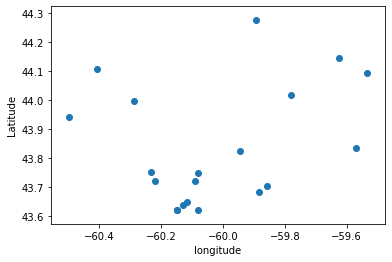

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob

files =  glob.glob('../data/tops/*.tops')

wells = [Well.from_csv(f) for f in files]

lat = []
lon = []
for w in wells:
    tlat, tlon = w.location
    lat.append(tlat)
    lon.append(tlon)
    
plt.scatter(lon, lat)
plt.xlabel('longitude')
plt.ylabel('Latitude')
plt.show()

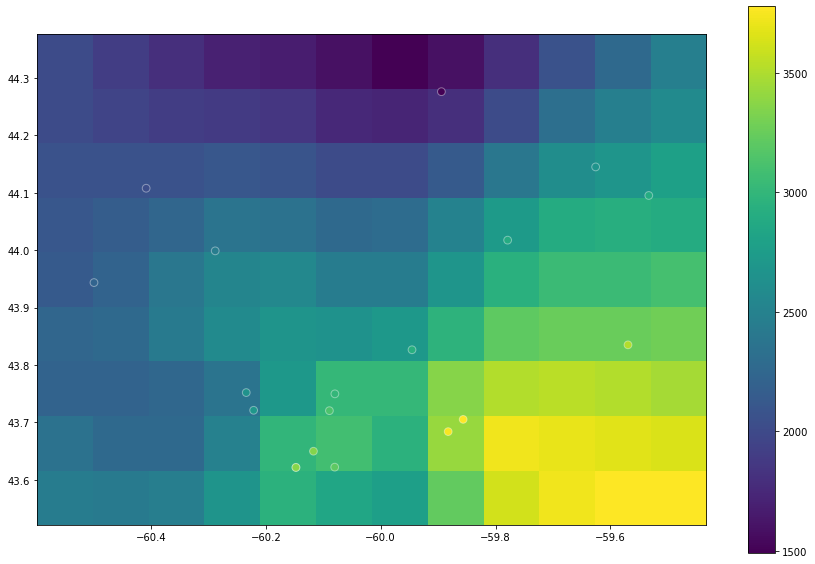

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.interpolate import Rbf

files =  glob.glob('../data/tops/*.tops')

wells = [Well.from_csv(f) for f in files]

lat = []
lon = []
tops = []
names = []
for w in wells:
    try:
        tops.append(w.tops['NASKAPI MB']['base'])
        tlat, tlon = w.location
        lat.append(tlat)
        lon.append(tlon)
        name.append(w.name)
    except:
        pass
    

# Build a regular grid with 0.1-degree cells.
extent = x_min, x_max, y_min, y_max = [min(lon)-0.1, max(lon)+0.1,
                                       min(lat)-0.1, max(lat)+0.1]
grid_x, grid_y = np.mgrid[x_min:x_max:0.1, y_min:y_max:0.1]

# Make the interpolator and do the interpolation.
rbfi = Rbf(lon, lat, tops)
di = rbfi(grid_x, grid_y)

# Make the plot.
plt.figure(figsize=(15,15))
plt.imshow(di.T, origin="lower", extent=extent)
cb = plt.scatter(lon, lat, s=60, c=tops, edgecolor='#ffffff66')
plt.colorbar(cb, shrink=0.67)
plt.show()
    